In [69]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [70]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [71]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [72]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [73]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [74]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [75]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [77]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [78]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 66s 102ms/step - loss: 1.2655 - accuracy: 0.5767 - val_loss: 0.6274 - val_accuracy: 0.6314
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5929 - accuracy: 0.6893 - val_loss: 0.5515 - val_accuracy: 0.7084
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4813 - accuracy: 0.7738 - val_loss: 0.9845 - val_accuracy: 0.6534
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4263 - accuracy: 0.8031 - val_loss: 0.5614 - val_accuracy: 0.7404
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3814 - accuracy: 0.8287 - val_loss: 1.7064 - val_accuracy: 0.6182
Epoch 6/10
625/625 [==============================] - 63s 100ms/step - loss: 0.3370 - accuracy: 0.8546 - val_loss: 0.6754 - val_accuracy: 0.7060
Epoch 7/10
625/625 [==============================] - 66s 106ms/step - loss: 0.2527 - accuracy: 0.8903 - val_loss: 0.4763 - val_ac

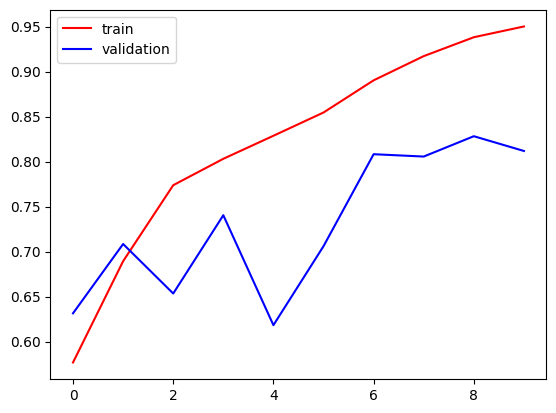

In [79]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

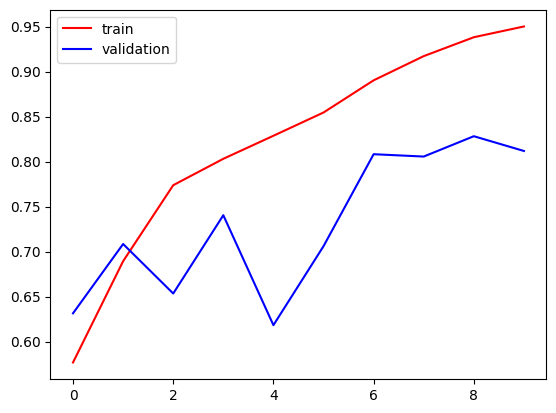

In [80]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

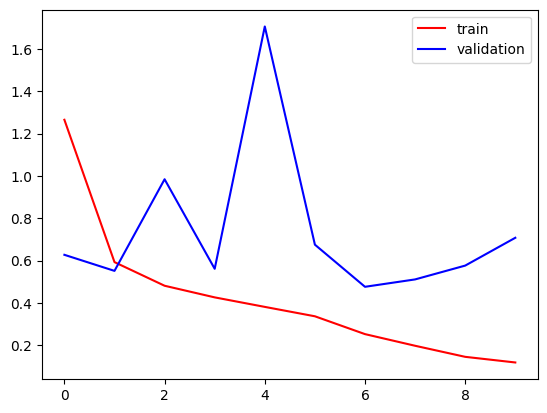

In [81]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

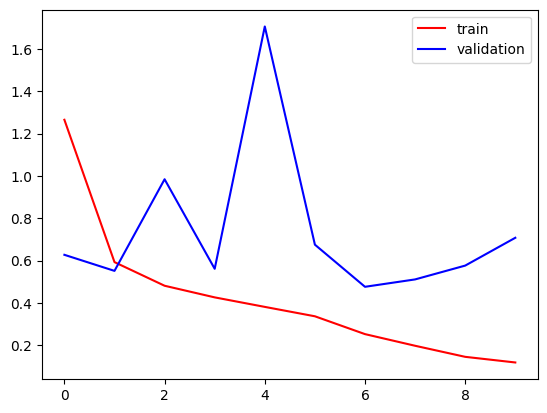

In [82]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [90]:
import cv2

In [91]:
test_img = cv2.imread('/content/cat.jpg')

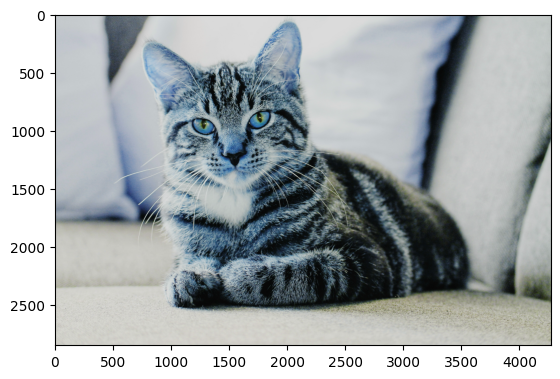

In [92]:
plt.imshow(test_img)

In [93]:
test_img.shape

(2848, 4272, 3)

In [94]:
test_img = cv2.resize(test_img,(256,256))

In [95]:
test_input = test_img.reshape((1,256,256,3))

In [96]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)